<a href="https://colab.research.google.com/github/MagomedNalgiev/Google-Colab/blob/main/ML_learn_Images_of_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow numpy matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 0.8559 - loss: 0.4662 - val_accuracy: 0.9805 - val_loss: 0.0656
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9809 - loss: 0.0626 - val_accuracy: 0.9817 - val_loss: 0.0582
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9861 - loss: 0.0434 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9902 - val_loss: 0.0404
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9919 - loss: 0.0245 - val_accuracy: 0.9878 - val_loss: 0.0490


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 4s - 12ms/step - accuracy: 0.9861 - loss: 0.0485
Test accuracy: 0.99


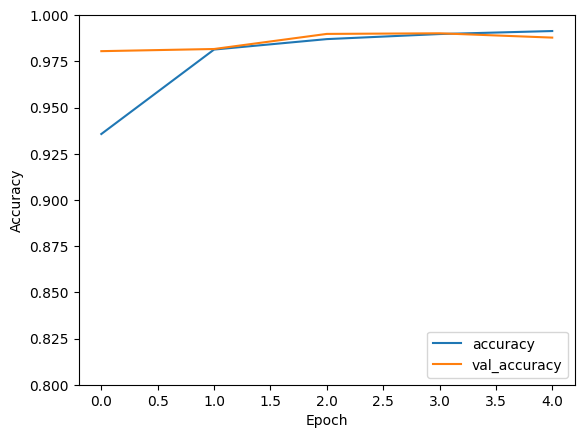

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.show()

In [14]:
import random

In [15]:
random_index = random.randint(0, len(X_test) - 1)

In [16]:
example_image = X_test[random_index]
true_label = np.argmax(y_test[random_index])

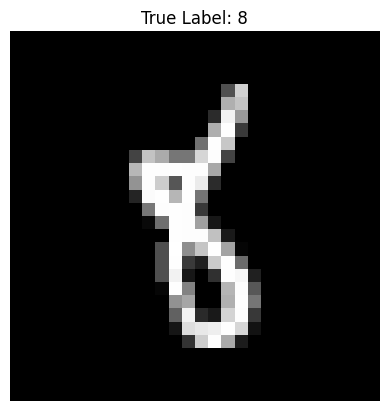

In [17]:
plt.imshow(example_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}")
plt.axis('off')
plt.show()

In [18]:
example_image_expanded = np.expand_dims(example_image, axis=0)
predicted_proba = model.predict(example_image_expanded)[0]
predicted_label = np.argmax(predicted_proba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [19]:
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Confidence: {predicted_proba[predicted_label]:.2f}")

Predicted Label: 8
Prediction Confidence: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


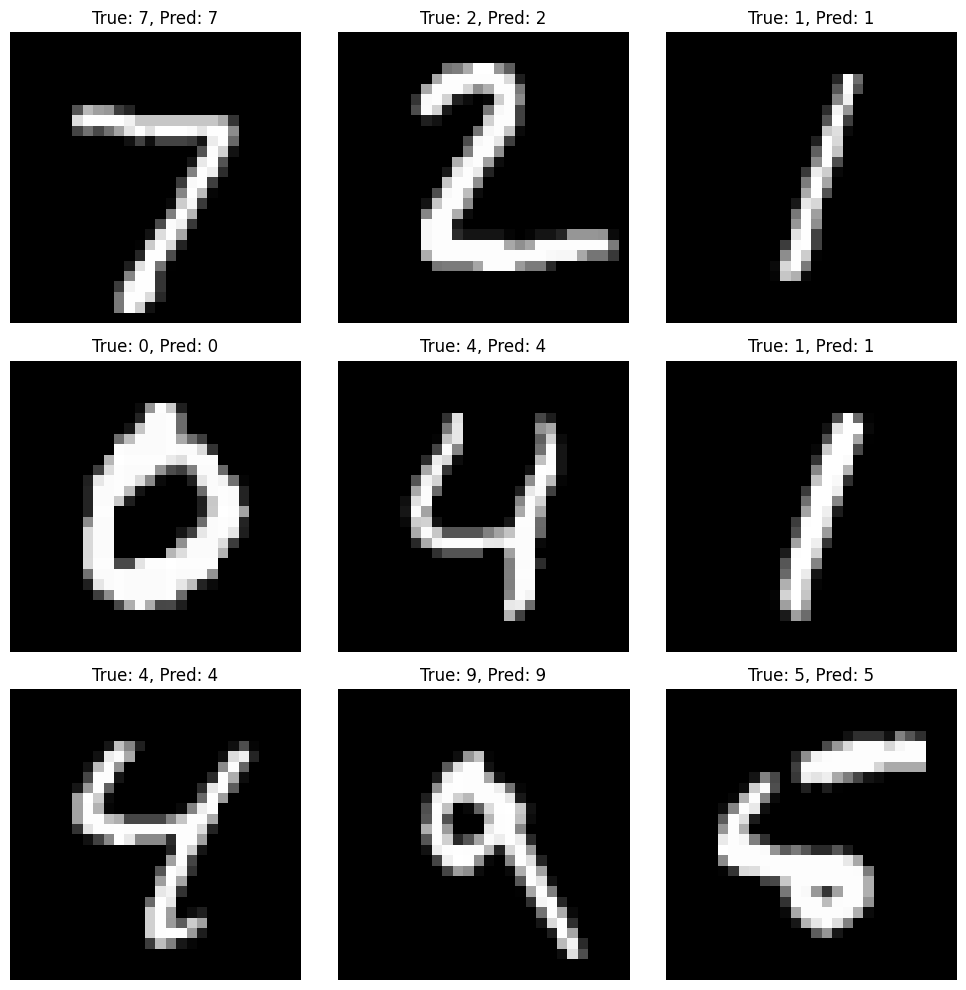

In [21]:
num_images = 9
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(3, 3, i+1)

    # Получение изображения и метки
    example_image = X_test[i]
    true_label = np.argmax(y_test[i])

    # Предсказание
    example_image_expanded = np.expand_dims(example_image, axis=0)
    predicted_proba = model.predict(example_image_expanded)[0]
    predicted_label = np.argmax(predicted_proba)

    # Показ изображения и метки
    plt.imshow(example_image.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()